# Hepatitis C Virus (HCV) for Egyptian patients  [Data Set](http://archive.ics.uci.edu/ml/datasets/Hepatitis+C+Virus+%28HCV%29+for+Egyptian+patients):

## EDA Steps:

1. Display summary statistics
2. Explore values 
3. Display histogram of individual features
4. Visualize Distribution of values with outcomes
5. Bivariates scatter plots
6. Correlation between features
7. Dimensionality reduciton using PCA and TSNE
8. Simple classifer

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00503/HCV-Egy-Data.zip

--2020-05-11 13:26:56--  http://archive.ics.uci.edu/ml/machine-learning-databases/00503/HCV-Egy-Data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66454 (65K) [application/x-httpd-php]
Saving to: ‘HCV-Egy-Data.zip.1’

HCV-Egy-Data.zip.1  100%[===================>]  64.90K   323KB/s    in 0.2s    

2020-05-11 13:26:57 (323 KB/s) - ‘HCV-Egy-Data.zip.1’ saved [66454/66454]



In [2]:
from zipfile import ZipFile
with ZipFile('HCV-Egy-Data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [3]:
import pandas as pd
import numpy as np

In [4]:
raw_data = pd.read_csv("./HCV-Egy-Data.csv")

In [5]:
raw_data

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [7]:
def describe_data(data):
    for column in data.columns:
        display(pd.crosstab(index=data[column],
                        columns='% observations', 
                        normalize='columns'))
        print("# of unique values {}".format(data[column].nunique()))

In [8]:
describe_data(raw_data)

col_0,% observations
Age,
32,0.036101
33,0.040433
34,0.034657
35,0.031769
36,0.036823
37,0.033213
38,0.034657
39,0.038989
40,0.026715


# of unique values 30


col_0,% observations
Gender,
1,0.510469
2,0.489531


# of unique values 2


col_0,% observations
BMI,
22,0.069314
23,0.070036
24,0.080866
25,0.066426
26,0.056318
27,0.071480
28,0.077256
29,0.067148
30,0.068592


# of unique values 14


col_0,% observations
Fever,
1,0.484477
2,0.515523


# of unique values 2


col_0,% observations
Nausea/Vomting,
1,0.497473
2,0.502527


# of unique values 2


col_0,% observations
Headache,
1,0.503971
2,0.496029


# of unique values 2


col_0,% observations
Diarrhea,
1,0.497473
2,0.502527


# of unique values 2


col_0,% observations
Fatigue & generalized bone ache,
1,0.501083
2,0.498917


# of unique values 2


col_0,% observations
Jaundice,
1,0.498917
2,0.501083


# of unique values 2


col_0,% observations
Epigastric pain,
1,0.496029
2,0.503971


# of unique values 2


col_0,% observations
WBC,
2991,0.000722
2995,0.000722
3001,0.000722
3007,0.000722
3009,0.000722
...,...
12082,0.000722
12088,0.000722
12093,0.000722


# of unique values 1305


col_0,% observations
RBC,
3816422.0,0.000722
3816997.0,0.000722
3817833.0,0.000722
3818313.0,0.000722
3818404.0,0.000722
...,...
5015030.0,0.000722
5015912.0,0.000722
5017591.0,0.000722


# of unique values 1384


col_0,% observations
HGB,
10,0.153069
11,0.161011
12,0.170397
13,0.162455
14,0.166787
15,0.186282


# of unique values 6


col_0,% observations
Plat,
93013.0,0.000722
93034.0,0.000722
93242.0,0.000722
93301.0,0.000722
93603.0,0.000722
...,...
226071.0,0.000722
226129.0,0.000722
226259.0,0.000722


# of unique values 1375


col_0,% observations
AST 1,
39,0.011552
40,0.011552
41,0.012996
42,0.013718
43,0.011552
...,...
124,0.015884
125,0.004332
126,0.005776


# of unique values 90


col_0,% observations
ALT 1,
39,0.014440
40,0.008664
41,0.012996
42,0.009386
43,0.010108
...,...
124,0.013718
125,0.007942
126,0.021661


# of unique values 90


col_0,% observations
ALT4,
39.0,0.010830
40.0,0.012274
41.0,0.012996
42.0,0.009386
43.0,0.017329
...,...
124.0,0.012996
125.0,0.010108
126.0,0.006498


# of unique values 90


col_0,% observations
ALT 12,
39,0.015884
40,0.008664
41,0.007942
42,0.012996
43,0.014440
...,...
124,0.011552
125,0.005054
126,0.009386


# of unique values 90


col_0,% observations
ALT 24,
39,0.011552
40,0.012274
41,0.015884
42,0.012996
43,0.014440
...,...
124,0.009386
125,0.008664
126,0.017329


# of unique values 90


col_0,% observations
ALT 36,
5,0.002166
39,0.017329
40,0.007942
41,0.013718
42,0.007942
...,...
124,0.006498
125,0.014440
126,0.009386


# of unique values 91


col_0,% observations
ALT 48,
5,0.002166
39,0.010830
40,0.007942
41,0.010830
42,0.010830
...,...
124,0.012996
125,0.012274
126,0.012996


# of unique values 91


col_0,% observations
ALT after 24 w,
5,0.002166
22,0.041155
23,0.041155
24,0.046931
25,0.049819
26,0.035379
27,0.029603
28,0.043321
29,0.036823


# of unique values 25


col_0,% observations
RNA Base,
11,0.000722
385,0.000722
1009,0.000722
1500,0.000722
4210,0.000722
...,...
1198310,0.000722
1199051,0.000722
1199901,0.000722


# of unique values 1384


col_0,% observations
RNA 4,
5,0.000722
190,0.000722
774,0.000722
813,0.000722
1573,0.000722
...,...
1200201,0.000722
1200273,0.000722
1200649,0.000722


# of unique values 1384


col_0,% observations
RNA 12,
5,0.277978
617,0.000722
2206,0.000722
2517,0.000722
2744,0.000722
...,...
806109,0.000722
806651,0.000722
809245,0.000722


# of unique values 1001


col_0,% observations
RNA EOT,
5,0.277256
408,0.000722
2460,0.000722
6198,0.000722
6325,0.000722
...,...
806669,0.000722
807175,0.000722
807218,0.000722


# of unique values 1002


col_0,% observations
RNA EF,
5,0.275812
570,0.000722
1417,0.000722
1876,0.000722
2549,0.000722
...,...
807603,0.000722
807660,0.000722
809017,0.000722


# of unique values 1004


col_0,% observations
Baseline histological Grading,
3,0.064260
4,0.067870
5,0.067148
6,0.073646
7,0.051986
8,0.070036
9,0.074368
10,0.062816
11,0.087365


# of unique values 14


col_0,% observations
Baselinehistological staging,
1,0.242599
2,0.239711
3,0.256318
4,0.261372


# of unique values 4


In [9]:
for column in raw_data.columns:
    print("{1}, {0}".format(column, raw_data[column].count()))
    

1385, Age 
1385, Gender
1385, BMI
1385, Fever
1385, Nausea/Vomting
1385, Headache 
1385, Diarrhea 
1385, Fatigue & generalized bone ache 
1385, Jaundice 
1385, Epigastric pain 
1385, WBC
1385, RBC
1385, HGB
1385, Plat
1385, AST 1
1385, ALT 1
1385, ALT4
1385, ALT 12
1385, ALT 24
1385, ALT 36
1385, ALT 48
1385, ALT after 24 w
1385, RNA Base
1385, RNA 4
1385, RNA 12
1385, RNA EOT
1385, RNA EF
1385, Baseline histological Grading
1385, Baselinehistological staging


In [10]:
categorical = ['Gender','Fever', 'Nausea/Vomting', 'Headache ', 
               'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
               'Epigastric pain ', 'Baseline histological Grading']

In [11]:
numerical = ['Age ','BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


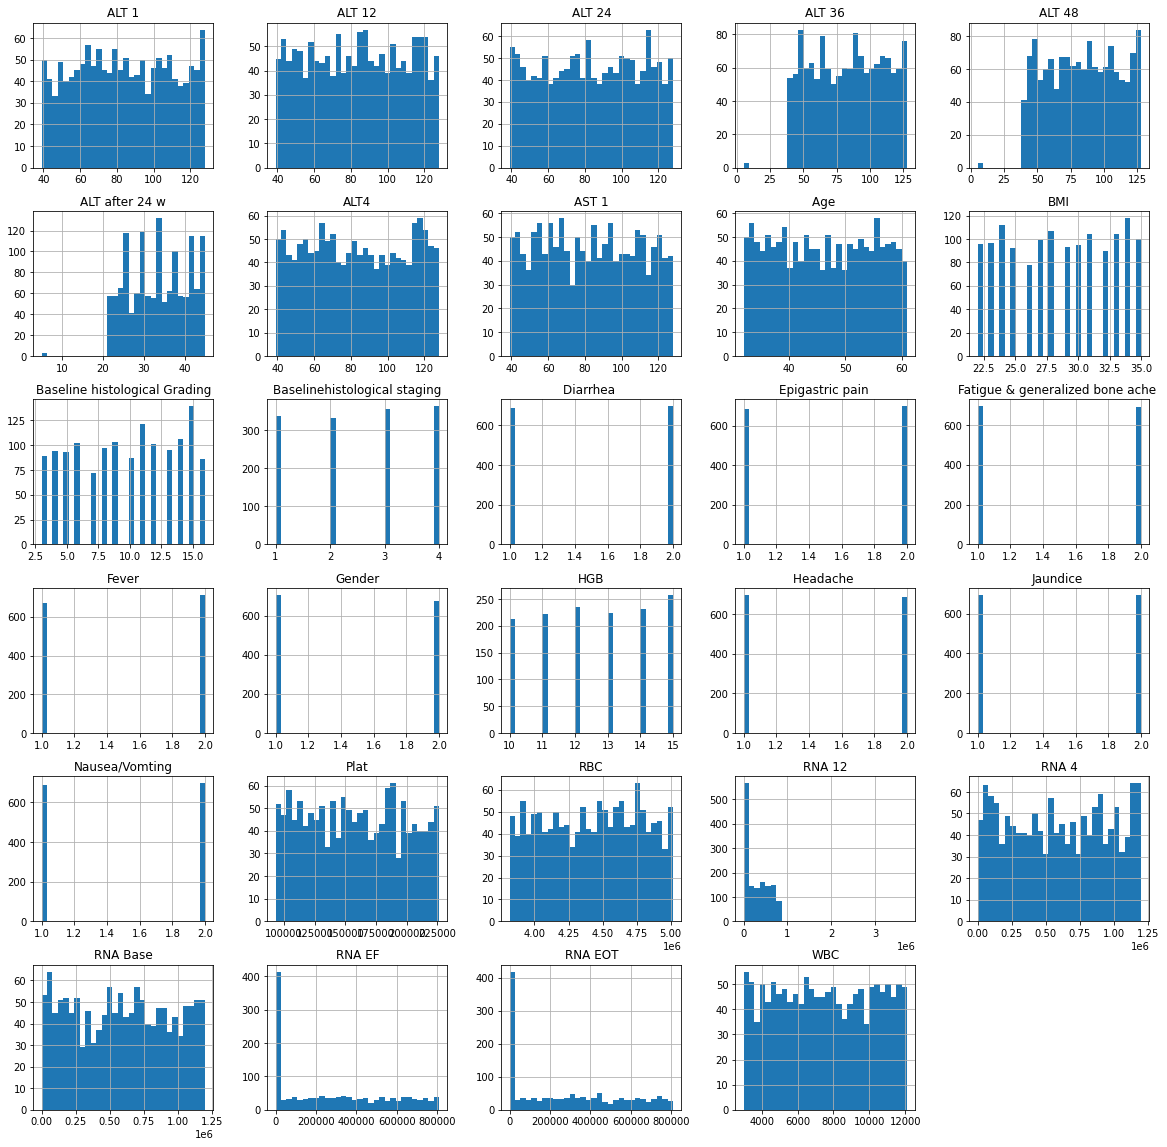

In [12]:
# show summary statistics
pd.set_option('display.max_columns', None)
display(raw_data.describe())

#check the table to see if any column in skweed or need to be normalized
# build histograms for each numeric feature
%matplotlib inline
hist = raw_data.hist(bins=30, figsize=(20,20))

In [13]:
import seaborn as sns

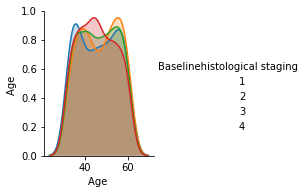

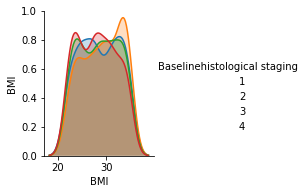

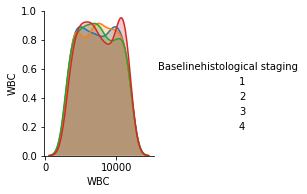

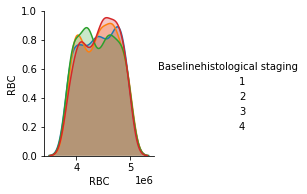

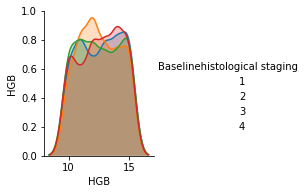

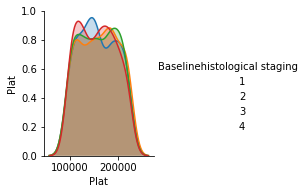

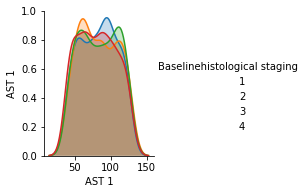

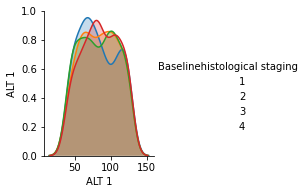

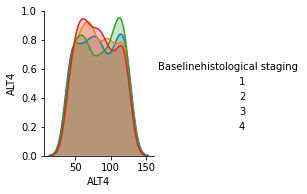

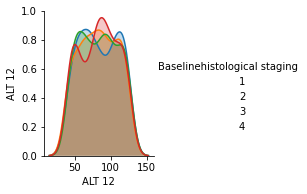

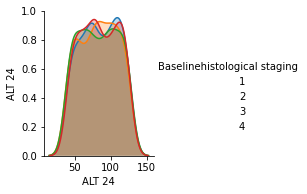

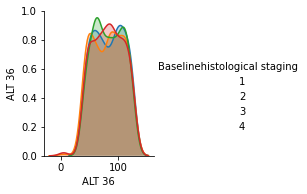

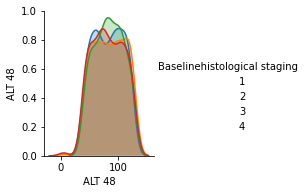

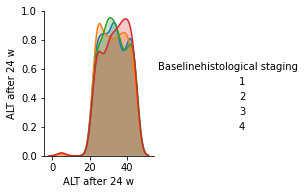

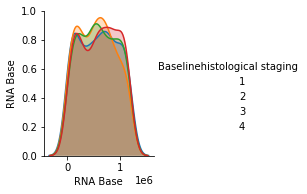

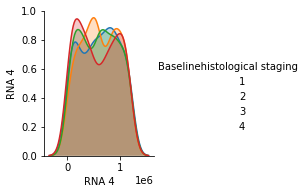

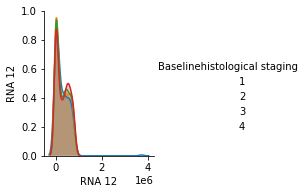

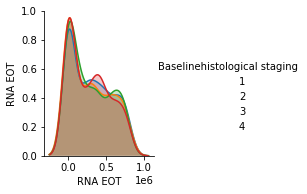

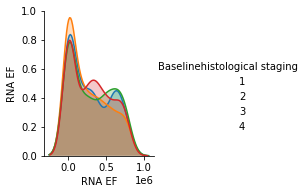

In [14]:
for cat in numerical:
    sns.pairplot(raw_data, x_vars = cat, y_vars=cat, hue="Baselinehistological staging")

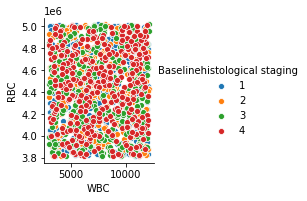

In [15]:
sns.pairplot(raw_data, x_vars = numerical[2:3], y_vars=numerical[3:4], hue="Baselinehistological staging")

Age                  AxesSubplot(0.125,0.749828;0.168478x0.130172)
BMI               AxesSubplot(0.327174,0.749828;0.168478x0.130172)
WBC               AxesSubplot(0.529348,0.749828;0.168478x0.130172)
RBC               AxesSubplot(0.731522,0.749828;0.168478x0.130172)
HGB                  AxesSubplot(0.125,0.593621;0.168478x0.130172)
Plat              AxesSubplot(0.327174,0.593621;0.168478x0.130172)
AST 1             AxesSubplot(0.529348,0.593621;0.168478x0.130172)
ALT 1             AxesSubplot(0.731522,0.593621;0.168478x0.130172)
ALT4                 AxesSubplot(0.125,0.437414;0.168478x0.130172)
ALT 12            AxesSubplot(0.327174,0.437414;0.168478x0.130172)
ALT 24            AxesSubplot(0.529348,0.437414;0.168478x0.130172)
ALT 36            AxesSubplot(0.731522,0.437414;0.168478x0.130172)
ALT 48               AxesSubplot(0.125,0.281207;0.168478x0.130172)
ALT after 24 w    AxesSubplot(0.327174,0.281207;0.168478x0.130172)
RNA Base          AxesSubplot(0.529348,0.281207;0.168478x0.130

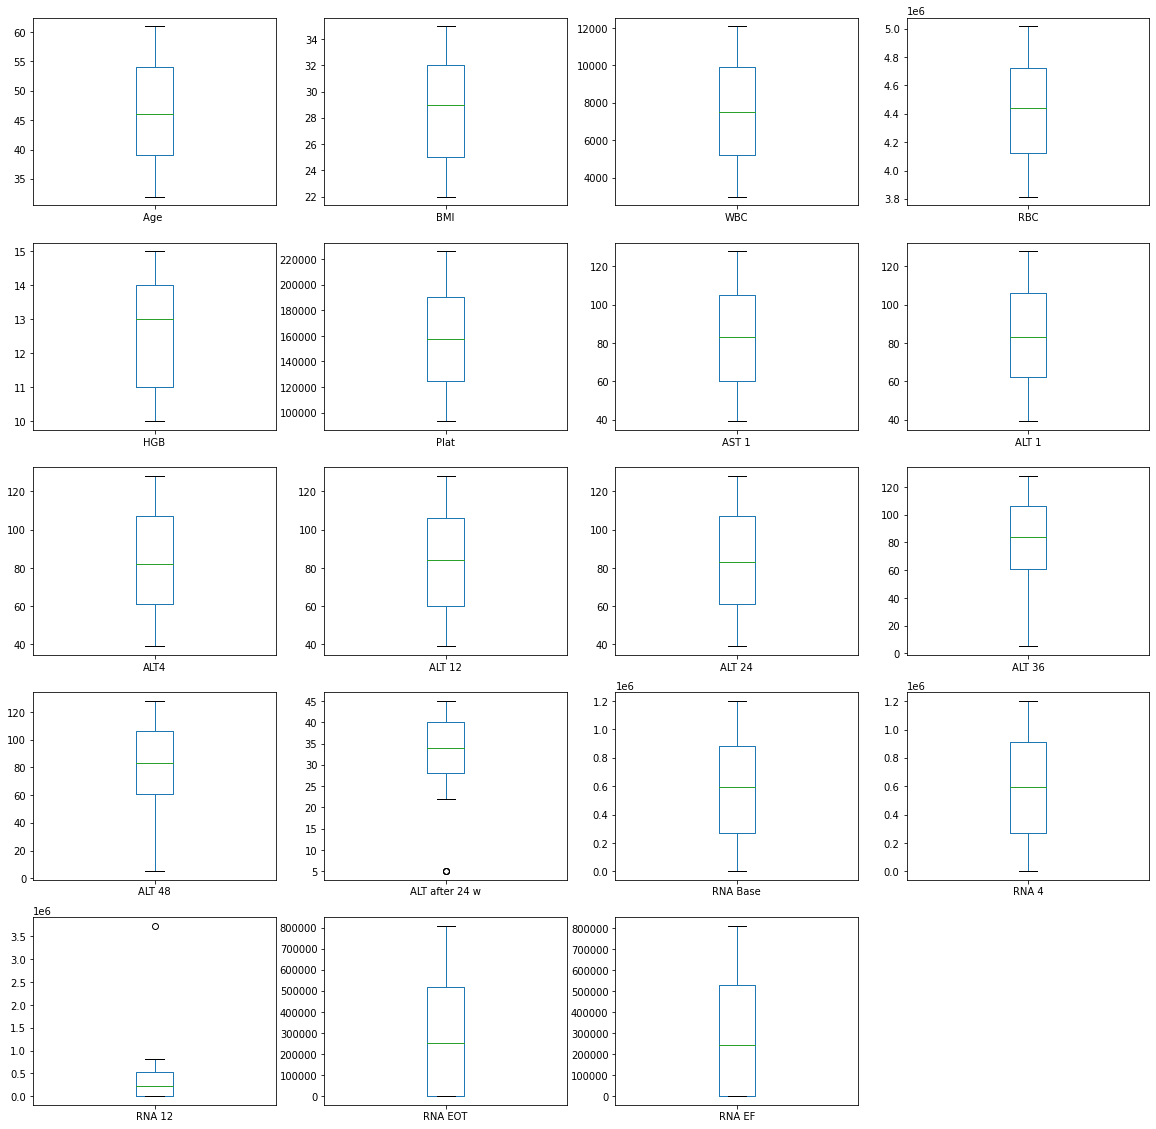

In [16]:
raw_data[numerical].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(20, 20))


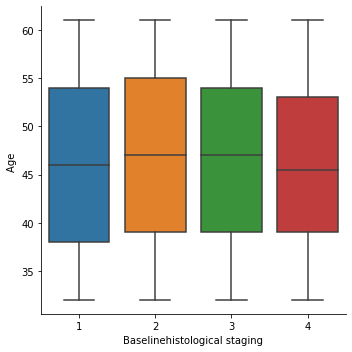

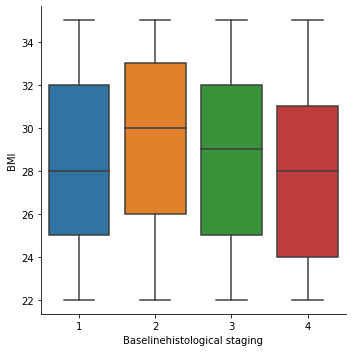

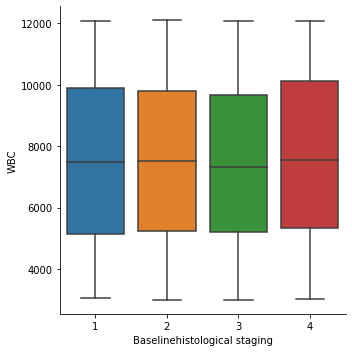

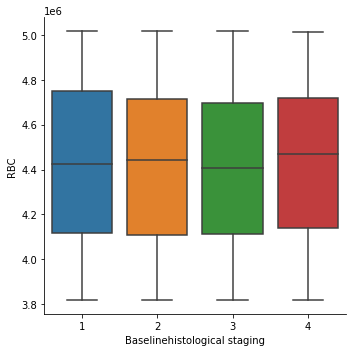

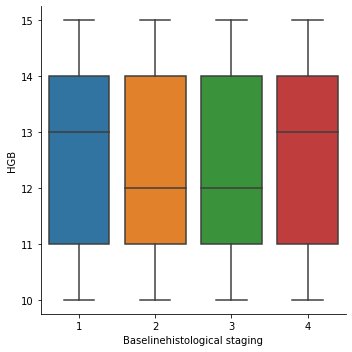

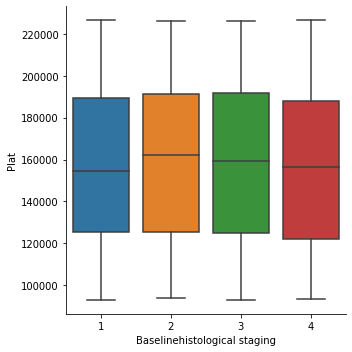

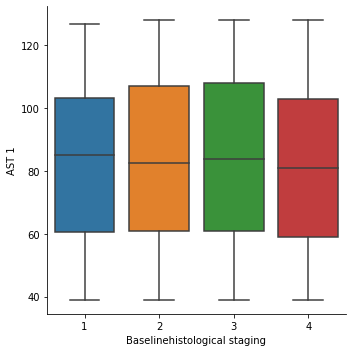

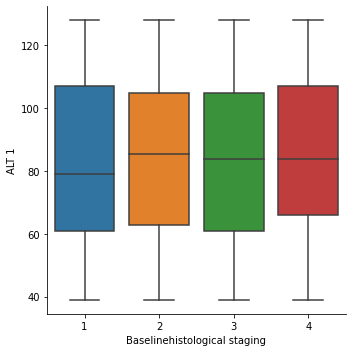

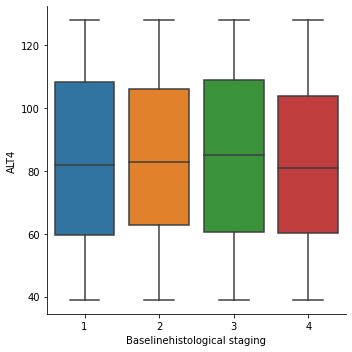

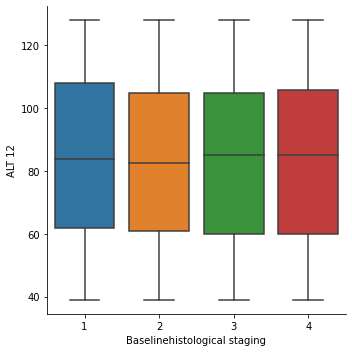

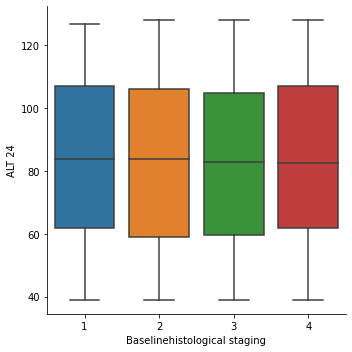

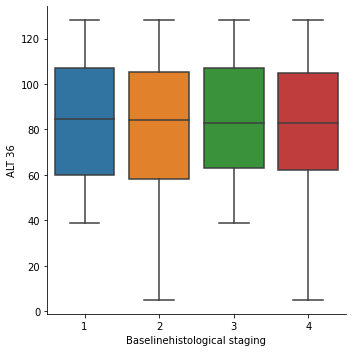

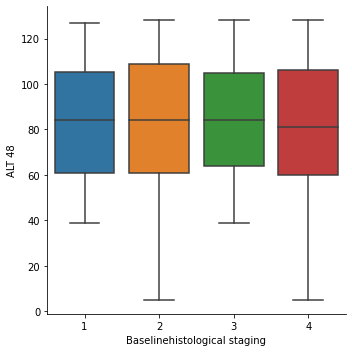

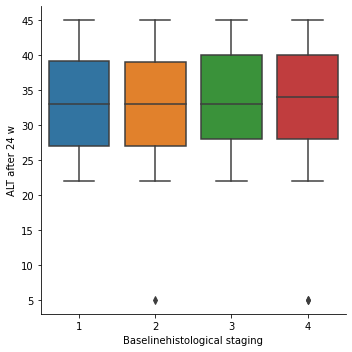

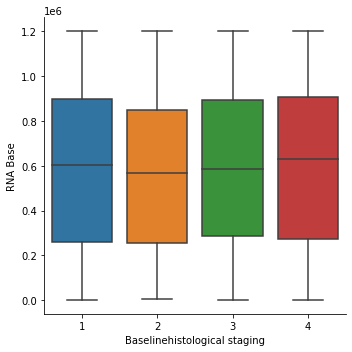

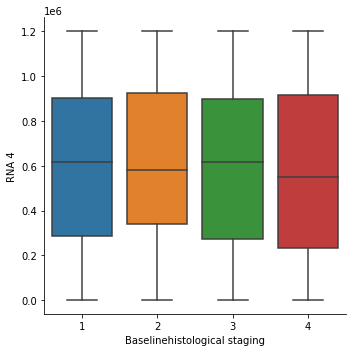

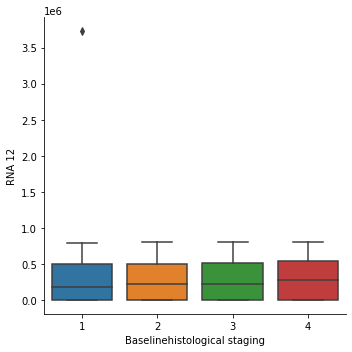

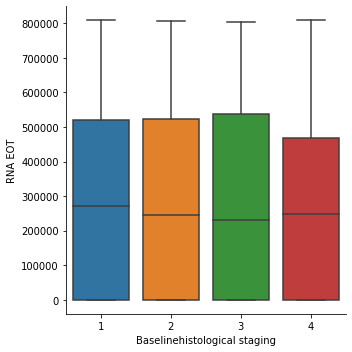

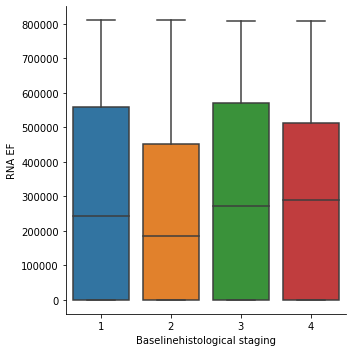

In [17]:
for cat in numerical:
    sns.catplot(y=cat, x="Baselinehistological staging", kind="box", data=raw_data);


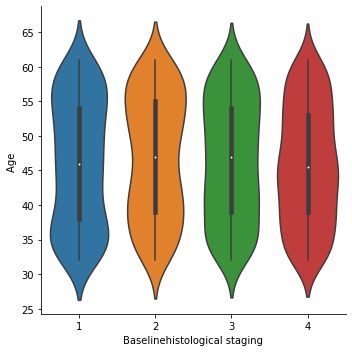

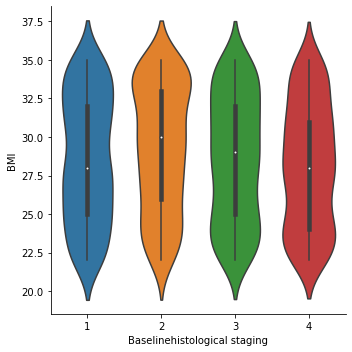

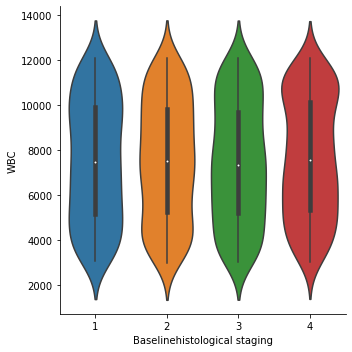

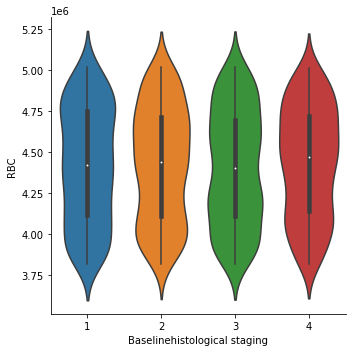

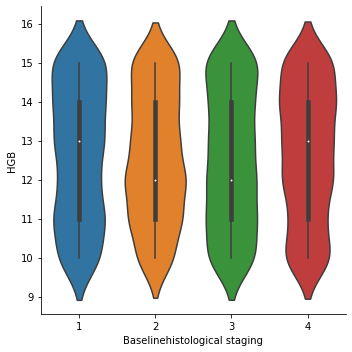

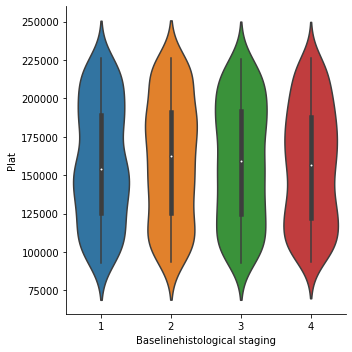

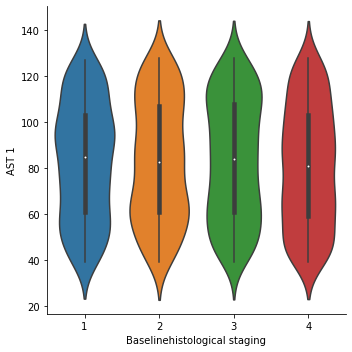

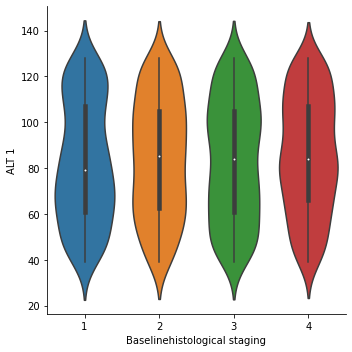

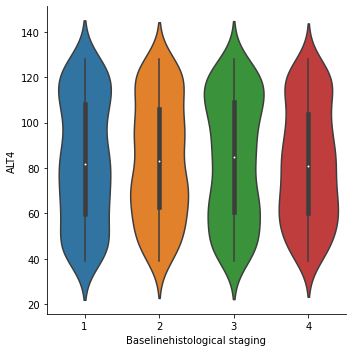

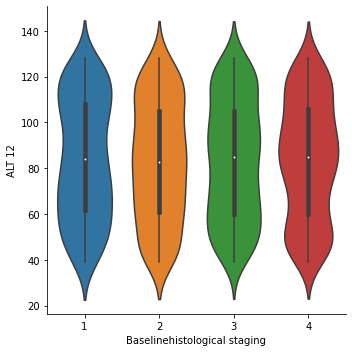

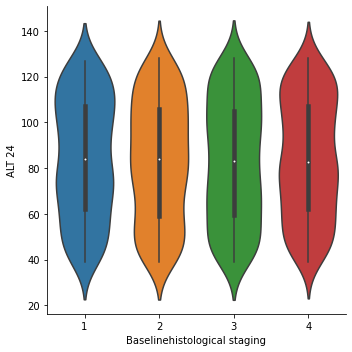

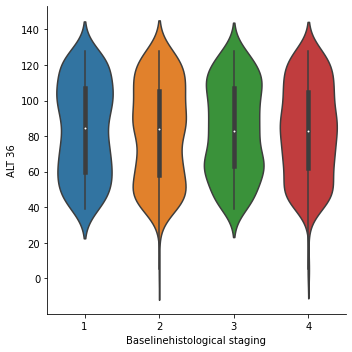

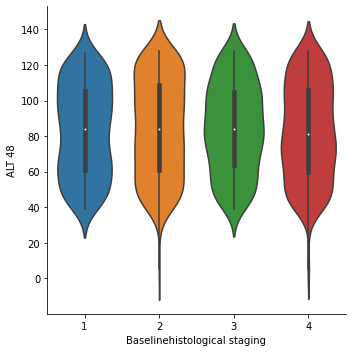

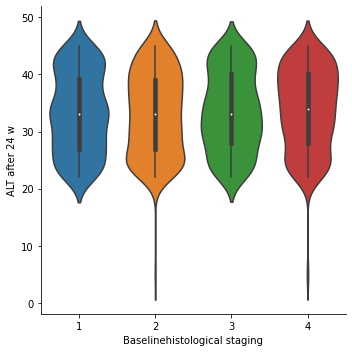

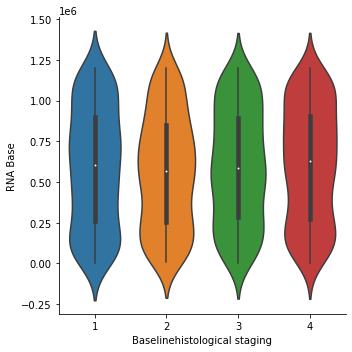

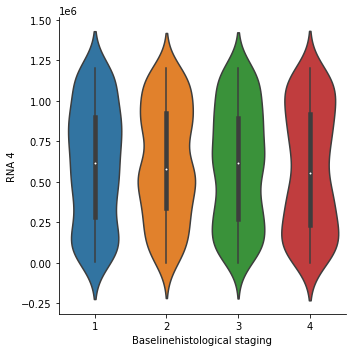

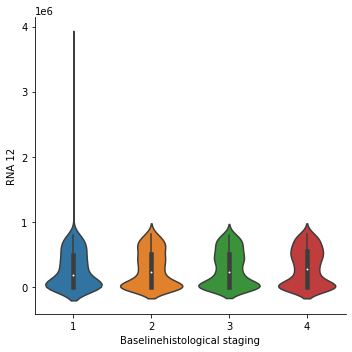

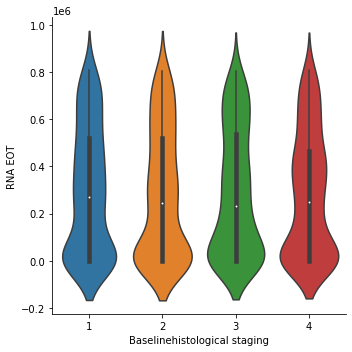

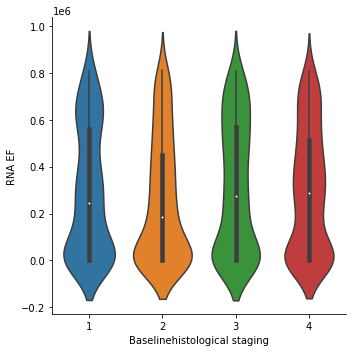

In [18]:
for cat in numerical:
    sns.catplot(y=cat, x="Baselinehistological staging", kind="violin", data=raw_data);

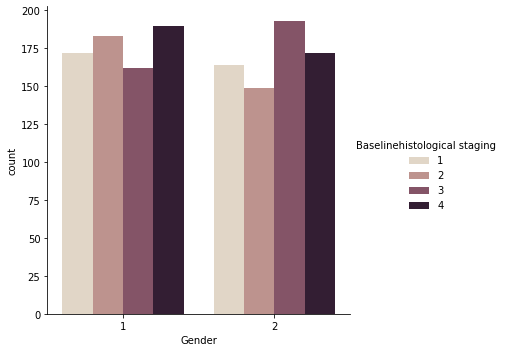

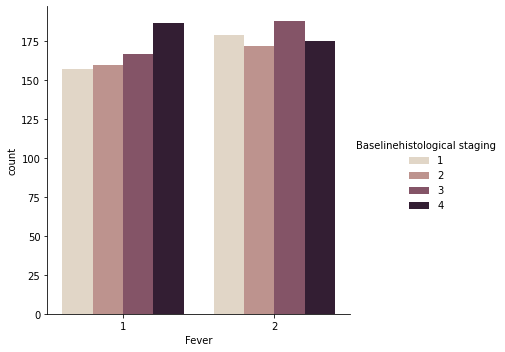

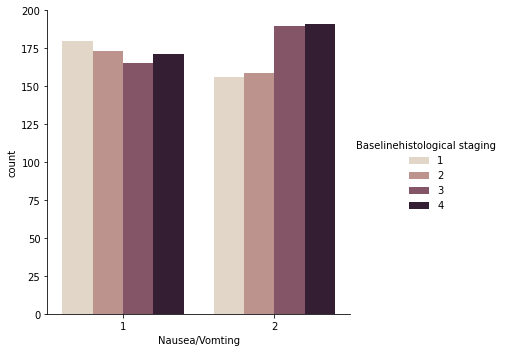

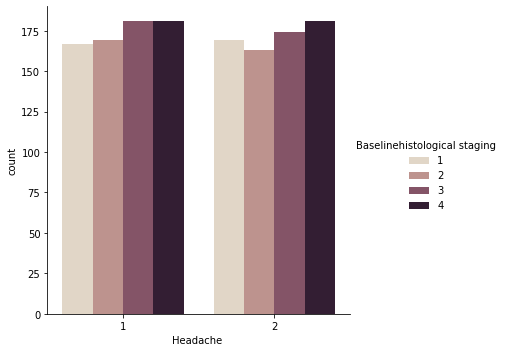

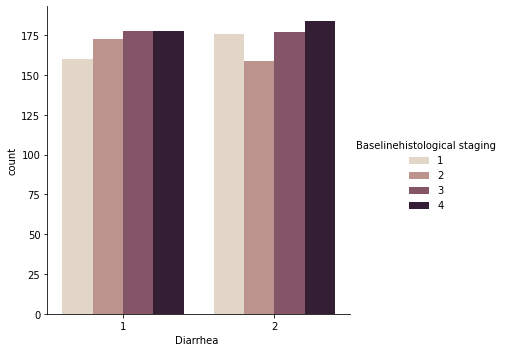

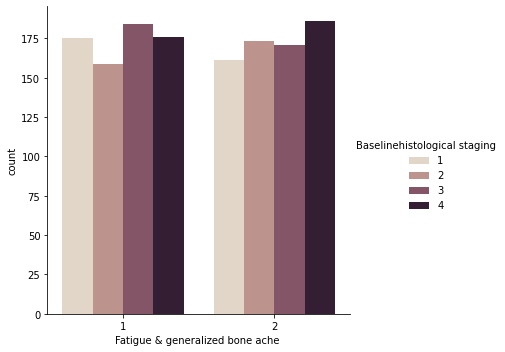

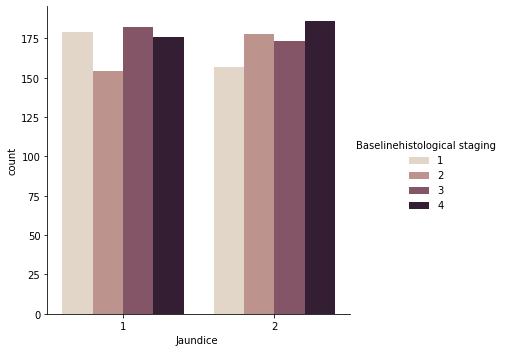

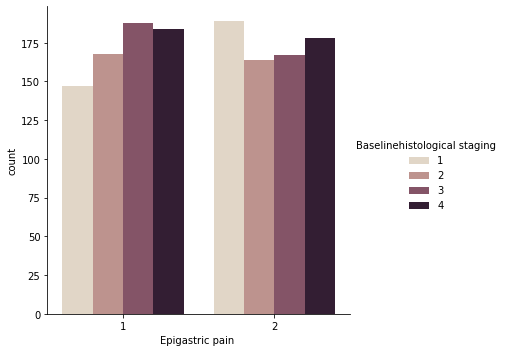

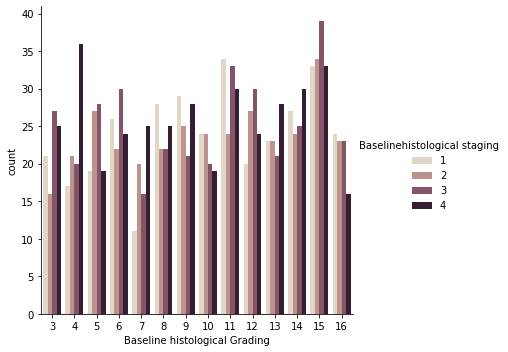

In [19]:
for cat in categorical:
    sns.catplot(x=cat, hue="Baselinehistological staging", kind="count", palette="ch:.25", data=raw_data);


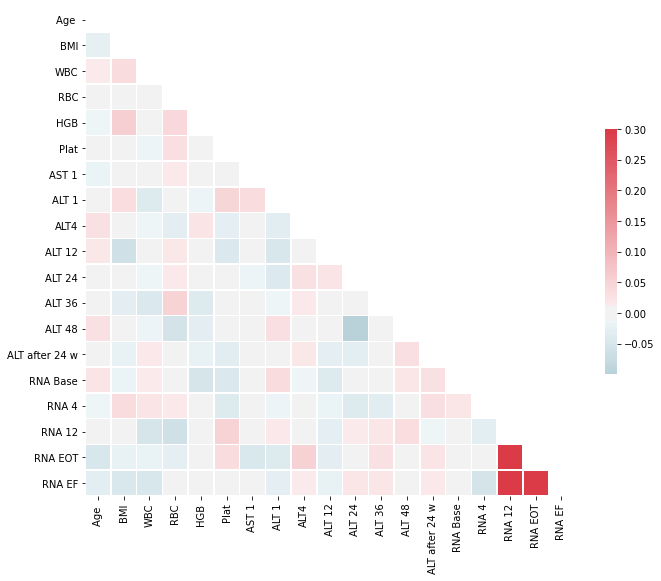

In [20]:
import matplotlib.pyplot as plt

corr = raw_data[numerical].corr()



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
features = raw_data[numerical + categorical]

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df = principalDf.join(raw_data[['Baselinehistological staging']].set_index(principalDf.index))
pca_df

,PC1,PC2,Baselinehistological staging
0,-2.462734e+05,-76262.900101,2
1,1.313011e+05,-255145.998077,2
2,9.987446e+04,134028.691496,4
3,4.645731e+05,330885.520077,3
4,1.758586e+06,998723.389089,1
...,...,...,...
1380,-3.151324e+05,-745880.521708,4
1381,8.125089e+04,-449030.953197,2
1382,3.299583e+05,112950.289048,2
1383,4.880502e+05,-542444.256085,3


In [29]:
outcome = raw_data["Baselinehistological staging"]
from sklearn.preprocessing import LabelEncoder
coded_outcome = LabelEncoder().fit_transform(outcome)
coded_outcome

array([1, 1, 3, ..., 1, 2, 2])

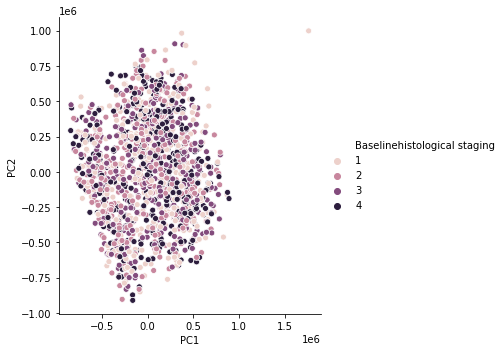

In [31]:
sns.relplot(x="PC1", y="PC2", hue="Baselinehistological staging",
            data=pca_df);


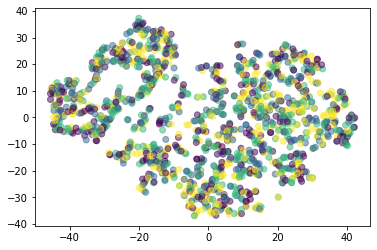

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate = 20)
transformed = model.fit_transform(features)

xs = transformed[:,0]
ys = transformed[:,1]


plt.scatter(xs, ys, c = raw_data["Baselinehistological staging"], alpha = 0.5)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [34]:
features = raw_data.drop(['Baselinehistological staging'], axis = 1)

In [35]:
features = features.values

In [36]:
features = features[:,-10:]
features.shape

(1385, 10)

In [39]:
coded_outcome

array([1, 1, 3, ..., 1, 2, 2])

In [40]:
from sklearn.model_selection import train_test_split

#classifer = svm.SVC(max_iter = 2000)
classifer = RandomForestClassifier(max_depth = 200, n_estimators = 20)
X_train, X_test, y_train, y_test = train_test_split( features, coded_outcome, test_size = 0.1, stratify = coded_outcome)
model = classifer.fit(X_train, y_train)
print('accuracy=', classifer.score(X_test, y_test))

accuracy= 0.35251798561151076


## Nothing better than a Dummy classifier!

In [41]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split


tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('cervical-cancer-pipeline.py')

from sklearn.metrics import precision_recall_fscore_support
y_pred = tpot.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred))

Generation 1 - Current best internal CV score: 0.28093172690763046
Generation 2 - Current best internal CV score: 0.28093172690763046
Generation 3 - Current best internal CV score: 0.28093172690763046
Generation 4 - Current best internal CV score: 0.28093172690763046
Generation 5 - Current best internal CV score: 0.28093172690763046

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=78, p=2, weights=uniform)
0.23741007194244604
(array([0.28      , 0.18918919, 0.2962963 , 0.22      ]), array([0.20588235, 0.21212121, 0.22222222, 0.30555556]), array([0.23728814, 0.2       , 0.25396825, 0.25581395]), array([34, 33, 36, 36]))
